# **Calorie Burn Prediction**

### Dataset Description

The dataset used in this study is publicly available on Kaggle (calories.csv). It contains 15,000 records with 9 columns, capturing user-specific exercise and biological information

The feature set includes demographic variables (gender, age), anthropometric measures (height, weight), and exercise-related variables (duration, heart rate, and body temperature). The target variable represents the total calories burned during an exercise session.

Explicit measurement protocols and units are not provided by the dataset source. Therefore, units were inferred based on physiologically plausible ranges commonly used in exercise science literature. This dataset is intended for instructional and methodological demonstration rather than real-world or clinical inference.


### Objective

The objective of this study is to develop and compare supervised regression models for predicting calories burned during structured exercise sessions. The focus is on understanding the structure of the data, evaluating linear and nonlinear modeling approaches, validating predictive performance rigorously, and interpreting results critically in light of dataset limitations. The study also demonstrates practical usability through deployment of a prediction application.

In [1]:
# Installing packages

!pip install xgboost
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error ,r2_score,mean_squared_error 
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading csv file

df=pd.read_csv("C:/Users/ASUS/Desktop/Datasets/Calories.csv")
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [4]:
df.shape

(15000, 9)

The data contains 15000 rows and 9 columns.

In [5]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


15000 non-null entries.

In [7]:
df.drop('User_ID', axis=1, inplace=True)  # drop the column

In [8]:
X=df.drop(columns=["Calories"])

In [9]:
y=df["Calories"]

In [10]:
# Splitting data: 80% train, 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
df_train = pd.concat([X_train, y_train], axis=1)

In [12]:
df_train 

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
9839,male,37,179,77,7,81,39.5,17
9680,male,23,195,87,26,110,40.5,167
7093,male,33,181,77,12,88,40.1,40
11293,female,66,156,54,9,77,39.5,34
820,female,32,144,49,5,90,39.0,23
...,...,...,...,...,...,...,...,...
5191,female,75,148,51,22,104,40.6,151
13418,female,21,172,67,20,104,40.7,114
5390,male,57,189,92,8,90,39.5,41
860,male,35,174,76,12,97,40.2,57


In [13]:
df_train.shape

(12000, 8)

Train dataset contains 12000 rows and 8 columns and the rest of the rows are contained in test dataset.

In [14]:
# Checking for duplicate rows
df_train.duplicated().sum()  

np.int64(1)

No duplicate rows are present in the train dataset.

In [15]:
# Let's check which column of the train dataset contains which type of data.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 9839 to 7270
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      12000 non-null  object 
 1   Age         12000 non-null  int64  
 2   Height      12000 non-null  int64  
 3   Weight      12000 non-null  int64  
 4   Duration    12000 non-null  int64  
 5   Heart_Rate  12000 non-null  int64  
 6   Body_Temp   12000 non-null  float64
 7   Calories    12000 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 843.8+ KB


 No missing values — every column has 12000 non-null entries

In [16]:
# Descriptive statistical measures of the training data
df_train.describe()                         

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,42.716667,174.401667,74.905917,15.483917,95.475917,40.021992,89.095417
std,16.949292,14.226707,15.006532,8.302539,9.540493,0.777927,62.178418
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,174.000000,74.000000,15.000000,95.000000,40.200000,78.000000
75%,56.000000,185.000000,86.000000,23.000000,103.000000,40.600000,137.000000
max,79.000000,218.000000,132.000000,30.000000,128.000000,41.500000,314.000000


The dataset contains 12,000 complete observations with no missing values. Age is concentrated in mid-adulthood (mean ≈ 43 years; IQR: 28–56), indicating limited representation of very young or elderly individuals. Height and weight show wide but plausible variability, reflecting a heterogeneous sample.

Exercise sessions are generally short to moderate (median duration = 15 minutes), and heart rate values (mean ≈ 95 bpm) are consistent with light-to-moderate activity. Calories burned display high dispersion and right skewness, suggesting heterogeneous exercise intensity.

Body temperature shows unusually low variability despite a high mean (~40 °C), which is physiologically implausible and strongly suggests synthetic or constrained data. Overall, the statistics are internally consistent but limit real-world physiological interpretation.

In [17]:
type(df_train)

pandas.core.frame.DataFrame

In [18]:
df_train.dtypes

Gender         object
Age             int64
Height          int64
Weight          int64
Duration        int64
Heart_Rate      int64
Body_Temp     float64
Calories        int64
dtype: object

The dataset includes one categorical variable (Gender) and multiple numerical variables. Most physiological and exercise-related features are stored as integers, indicating discretized or rounded measurements, while body temperature is recorded as a continuous float. This mixed data structure is suitable for basic statistical and modeling tasks but suggests limited measurement precision, reinforcing that the dataset is intended for instructional rather than real-world physiological analysis.

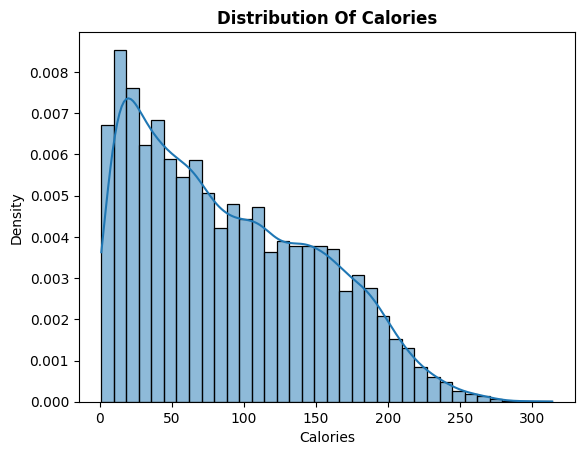

In [19]:
sns.histplot(df_train['Calories'],kde=True,stat="density")
plt.title("Distribution Of Calories",fontweight="bold")
plt.xlabel("Calories")
plt.ylabel("Density")
plt.show()
# kde=True adds a smooth curve showing the distribution.
# That curve is scaled as a probability density — so it only makes sense if the histogram also uses stat="density".

### Distribution Of Calories

- Most people burn between 0 to ~150 Calories
- The peak (mode) appears between 25–50 calories, meaning this is the most common calorie burn range.
- The distribution is right-skewed, meaning:
    - Many low calorie burns
    - Fewer high calorie burns (long tail)
- There’s a long tail stretching beyond 250–300 calories, suggesting high variability in the upper end.
- This data likely represents short sessions or mild activity for most people.
- Calorie values span from 0 to over 300.This shows a high variance — people have very different activity levels or session durations.
- Values beyond 250–300 are much less frequent.
- This gives us a great understanding of the target variable before modeling.


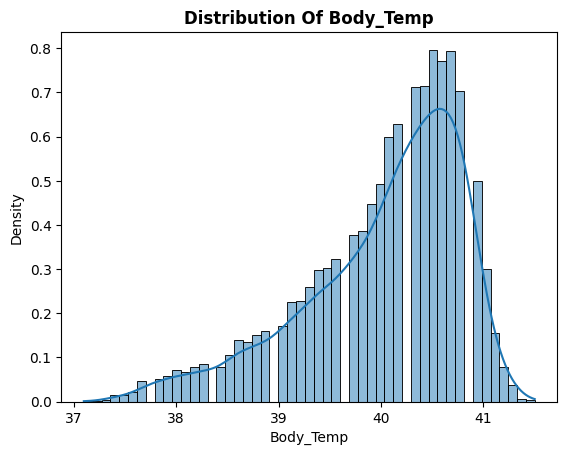

In [20]:
sns.histplot(df_train['Body_Temp'],kde=True,stat="density")
plt.title("Distribution Of Body_Temp",fontweight="bold")
plt.xlabel("Body_Temp")
plt.ylabel("Density")
plt.show()

### Distribution Of Body_Temp

- The distribution is left-skewed (negatively skewed):
    - The tail is on the left, with fewer people having low body temperatures.
    - Most values are on the right side, i.e., higher body temperatures.
- The peak (mode) is around 40.4–40.7°C, suggesting this is the most common body temperature in the dataset.
- The body temperatures range from ~37°C to ~41.5°C. This shows a relatively narrow range, but there's a dense cluster at the higher end.
- The left tail (below ~38°C) is sparse but does not show strong, extreme outliers. So, few outliers is a fair observation.


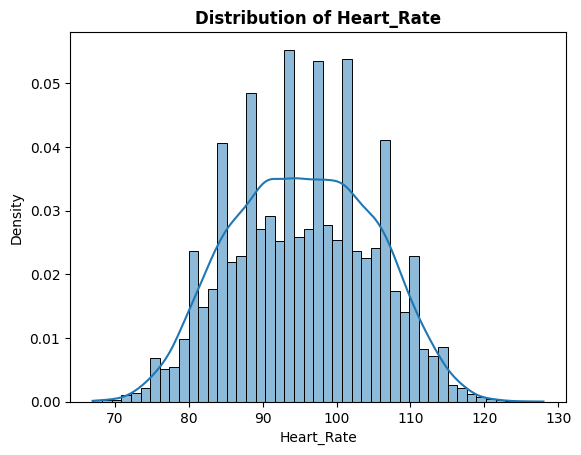

In [21]:
sns.histplot(df_train['Heart_Rate'],kde=True,stat="density")
plt.title("Distribution of Heart_Rate",fontweight="bold")
plt.xlabel("Heart_Rate")
plt.ylabel("Density")
plt.show()

### Distribution of Heart_Rate

- The histogram is approximately symmetric and bell-shaped.
- The peak is at the center — this is the mean/median/mode, and they likely all occur around the same value. This suggests that the data is centered and balanced.
- The data spreads symmetrically from the center toward both sides. The spread is moderate, suggesting healthy variability among individuals.
- There are some sharp spikes or uneven bars — likely caused by data granularity or rounding. Still, no extreme outliers are apparent.
- Those sharp spikes mean that some heart rate values occur much more frequently, likely because the data is rounded or captured in fixed intervals, not continuous measurements.

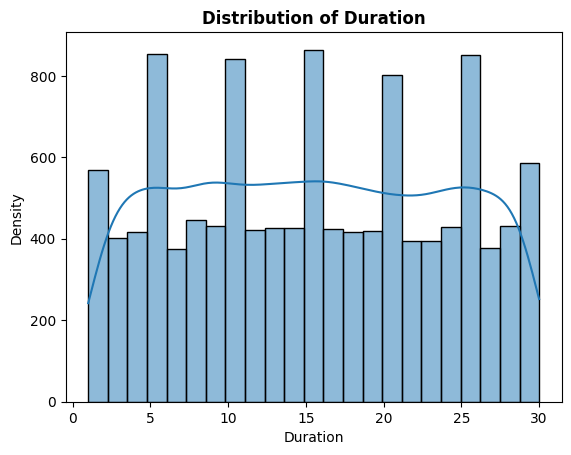

In [22]:
sns.histplot(df_train['Duration'],kde=True,stat="count")
plt.title("Distribution of Duration", fontweight="bold")
plt.xlabel("Duration")
plt.ylabel("Density")
plt.show()

### Distribution of Duration

- The histogram appears flat overall, with bars of roughly equal height.
- This suggests a uniform distribution, where all values occur with similar frequency.
- Here are periodic tall bars (sharp vertical jumps) at regular intervals.
- This is a clear sign of data repetition or grouping at specific values.
- The distribution is not skewed — it's symmetric and flat.
- There's no bias toward shorter or longer durations.

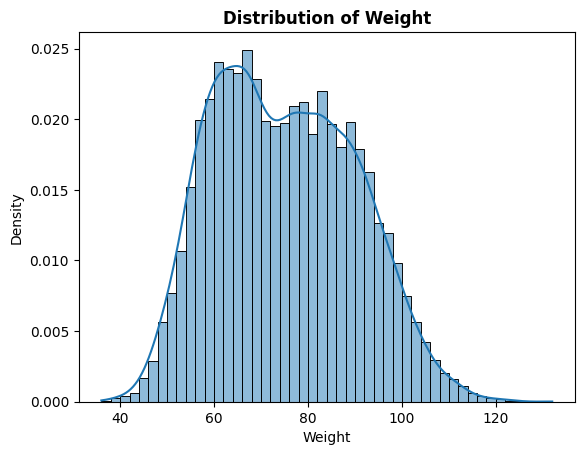

In [23]:
sns.histplot(df_train['Weight'],kde=True,stat="density")
plt.title("Distribution of Weight",fontweight="bold")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.show()

### Distribution of Weight

- The histogram shows a slightly positively skewed.
- The peak (mode) is evident towards the lower-middle values, where bars are highest.
- Majority of people represented are likely of a normal-to-average weight.
- Fewer people have extremely high weights, aligning with typical real-world distributions of body weight.


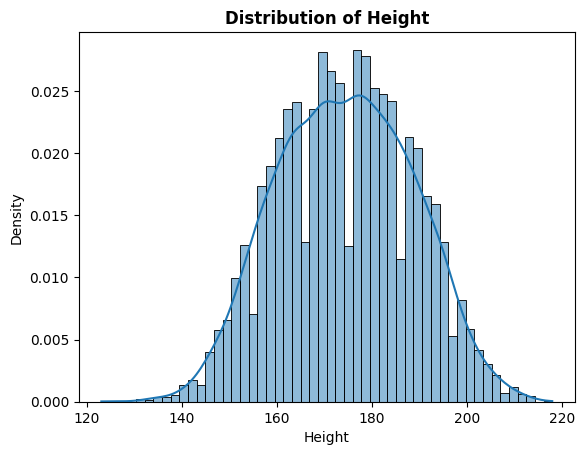

In [24]:
sns.histplot(df_train['Height'],kde=True,stat="density")
plt.title("Distribution of Height", fontweight="bold")
plt.xlabel("Height")
plt.ylabel("Density")
plt.show()

### Distribution of Height

- The histogram is symmetrical and bell-shaped, closely resembling a normal distribution.
- The values spread evenly around the center. This suggests moderate variability.
- No significant outliers observed.
- Most people in this sample are of average adult stature. Short and very tall individuals are present but rare. 

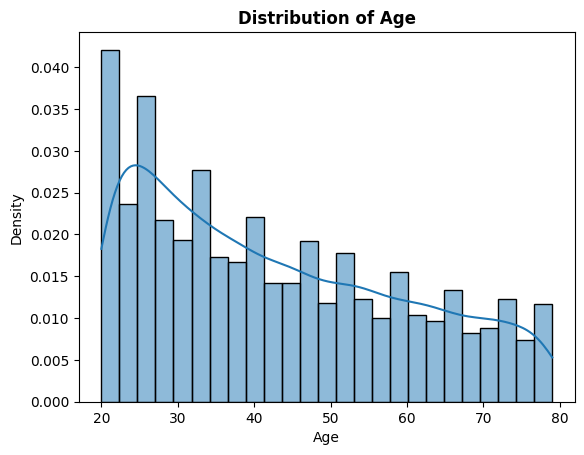

In [25]:
sns.histplot(df_train['Age'],kde=True,stat="density")
plt.title("Distribution of Age",fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

### Distribution of Age

- Positively-skewed distribution.
- The “tail” (right side) stretches far out, showing that while most people have low values, a few have much higher values—sometimes a LOT higher.
- Most people are younger.
- Fewer people are older, and their ages gradually taper off into a long tail on the right.
- Suggests young-dominated population with fewer older individuals.

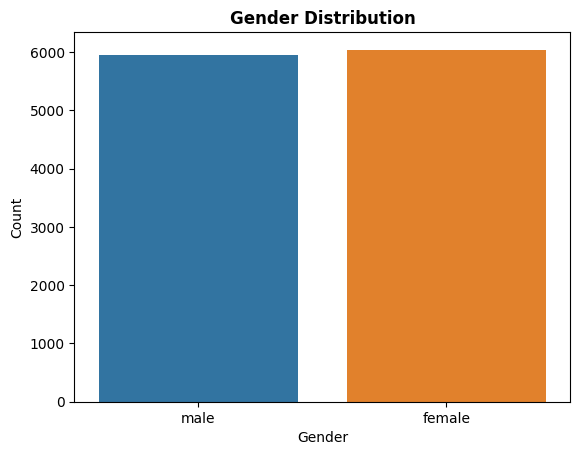

In [26]:
sns.countplot(data=df_train,x='Gender',palette={'male': '#1f77b4', 'female': '#ff7f0e'})
plt.title("Gender Distribution",fontweight="bold")
plt.ylabel("Count")
plt.show()
# countplot = for counting categorical occurrences
# barplot = for plotting precomputed values (e.g., average, sum)

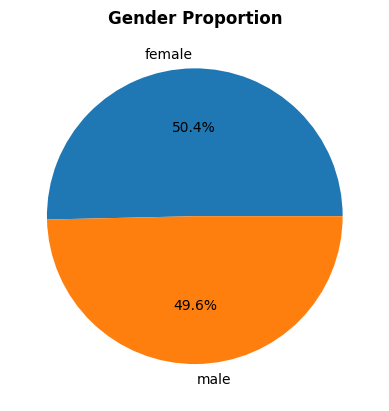

In [27]:
df_train["Gender"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Gender Proportion",fontweight="bold")
plt.ylabel("")
plt.show()
# .value_counts(): Counts how many times each unique gender appears.
# .plot.pie(autopct='%1.1f%%'): Plots the result as a pie chart. autopct='%1.1f%%' formats the percentages inside the chart to 1 decimal place, like 55.4%.

### Gender

- The two categories are nearly equal in size — there is no significant dominance.
- The data represents a balanced distribution, ideal in scenarios where equity matters.


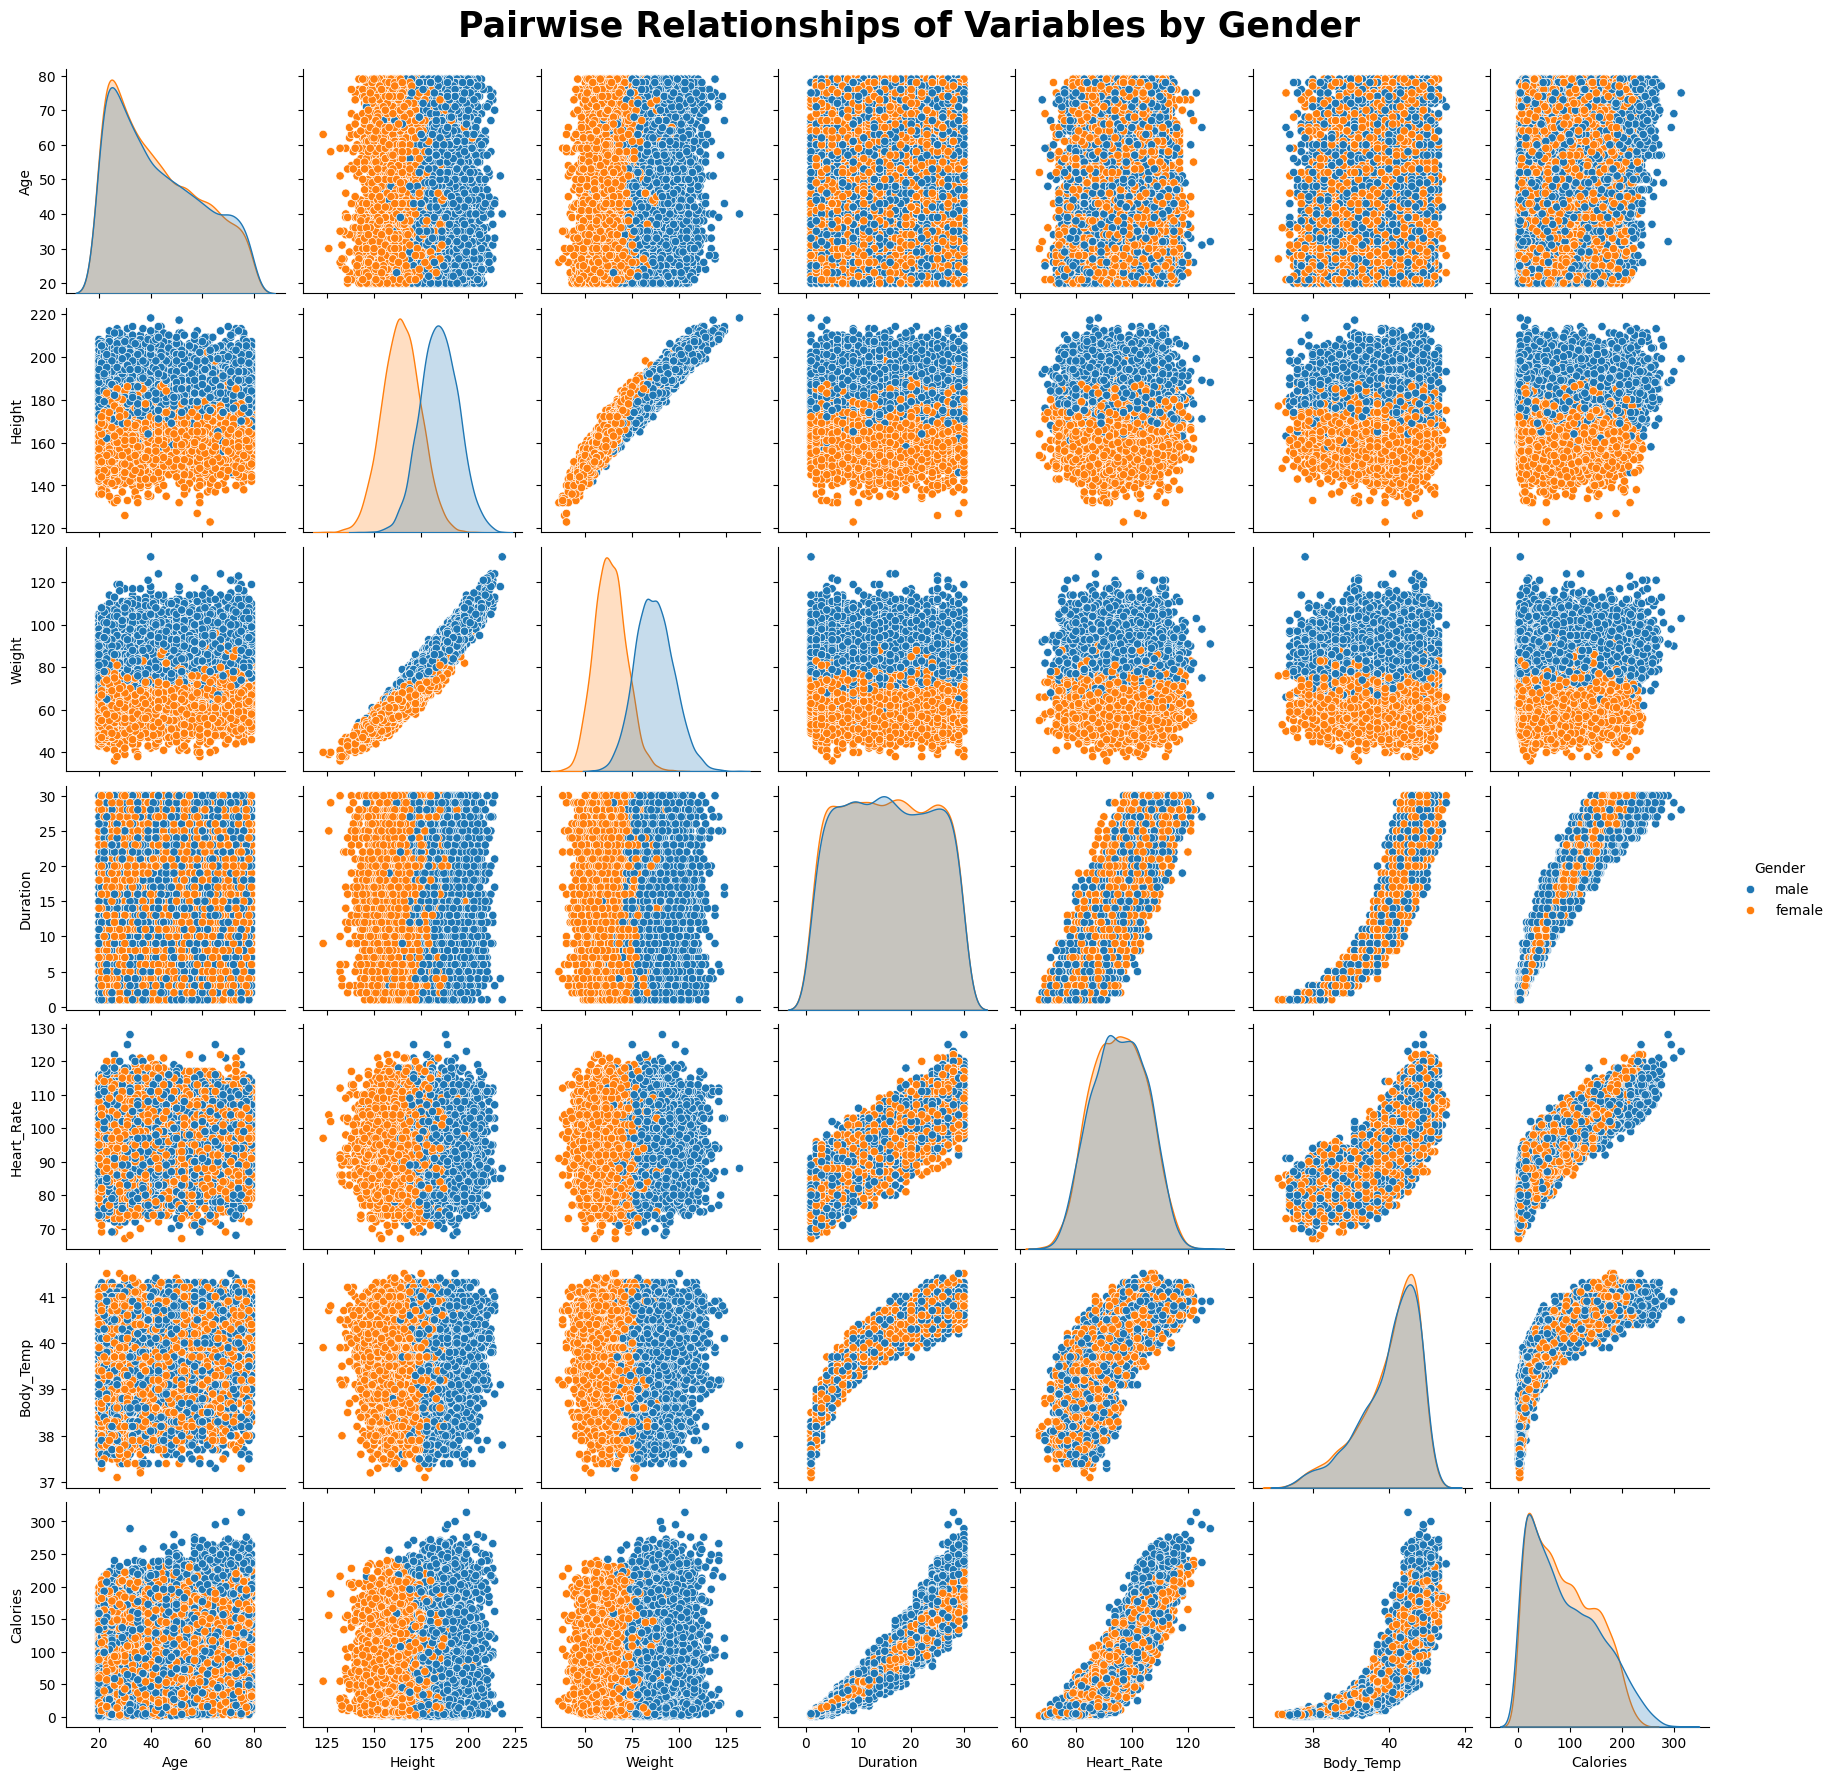

In [28]:
g = sns.pairplot(df_train, hue="Gender")
g.figure.suptitle("Pairwise Relationships of Variables by Gender", y=1.02, fontweight="bold",fontsize=25)
plt.show()


### Pairwise Relationships of Variables by Gender

- **Relationships involving age:** 
The scatterplot matrix indicates no apparent linear association between Age and either Height or Weight, as the corresponding panels show diffuse, rectangular point clouds without a clear slope. Age also shows no visible relationship with Duration, Heart_Rate, Body_Temp, or Calories, suggesting that, within this sample, age is largely independent of the exercise‑related variables. In contrast, the marginal distribution of Age is substantially more dispersed than those of Height and Weight, reflecting a wider range of ages compared with the relatively concentrated anthropometric measures.

- **Height, weight, and gender:** 
Height and Weight exhibit a strong, approximately linear positive association, with observations forming a tight upward‑sloping band in the Height–Weight panel. Male participants are predominantly located in the upper and right portions of this band, indicating that they tend to be taller and heavier, whereas female participants cluster toward lower height and weight values. Beyond this relationship, Height shows no clear association with Duration, Heart_Rate, Body_Temp, or Calories, as evidenced by the absence of discernible trends in the corresponding scatterplots.

- **Duration, heart rate, temperature, and calories:**
A pronounced positive, near‑linear relationship is observed between Duration and Heart_Rate, with longer exercise sessions associated with higher heart rates. Duration also appears to be positively related to Body_Temp and Calories, although these relationships are curved and thus better characterized as non‑linear. Similarly, Heart_Rate is positively associated with both Calories and Body_Temp, and Body_Temp itself increases with Calories; in all three cases, the point clouds reveal monotonic but non‑linear patterns rather than straight lines.


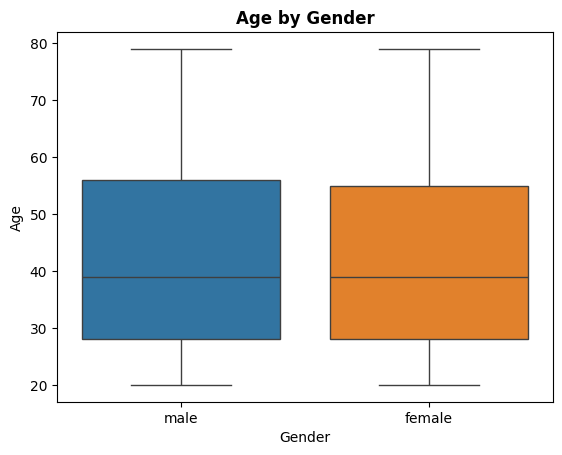

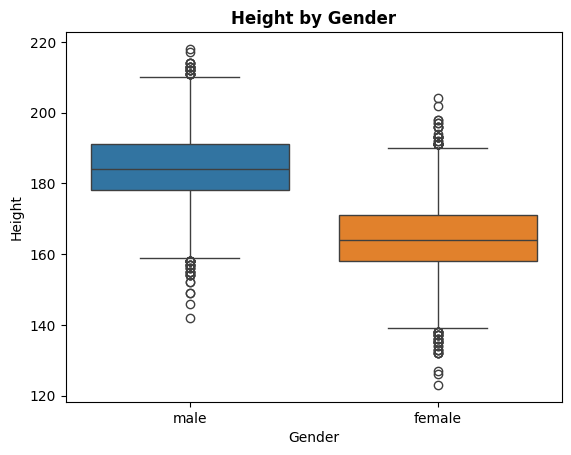

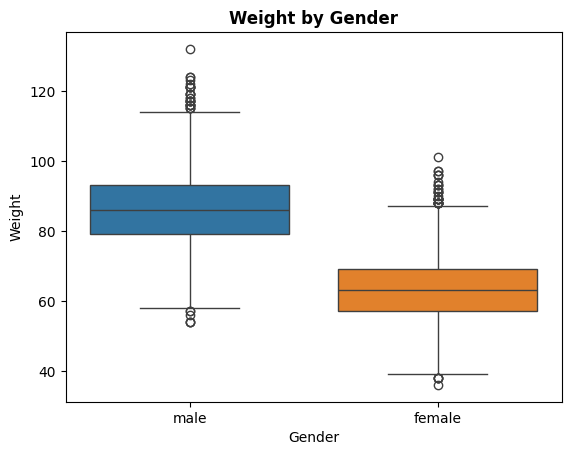

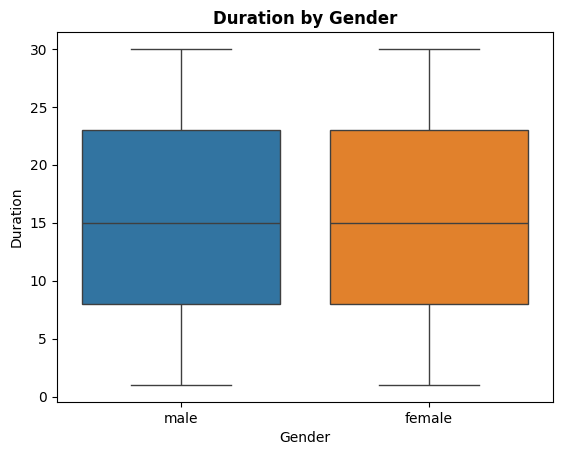

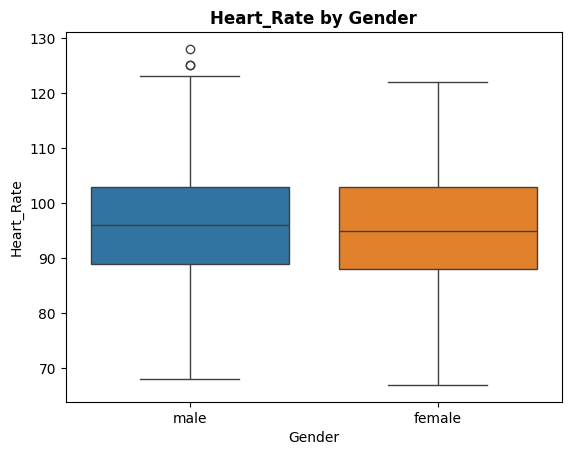

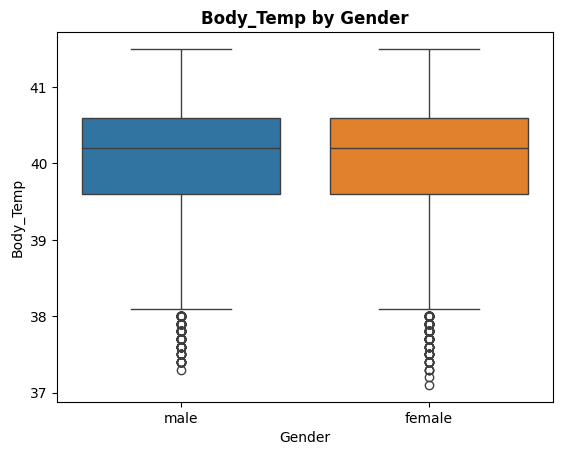

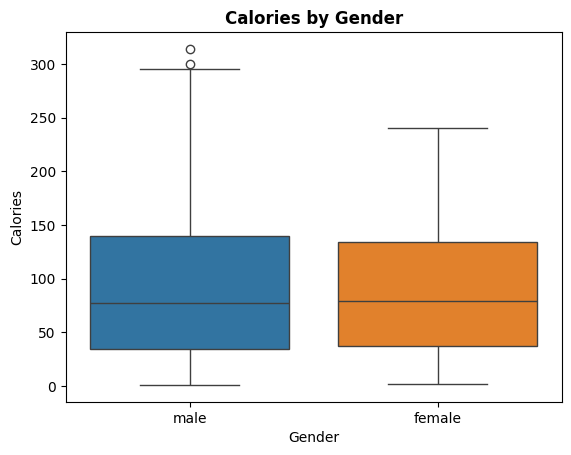

In [29]:
for col in df_train.select_dtypes(include='number').columns:
    sns.boxplot(data=df_train,x='Gender',y=col,palette={'male': '#1f77b4', 'female': '#ff7f0e'})
    plt.title(f"{col} by Gender",fontweight="bold")
    plt.show()       

### Boxplot: Age by Gender

- Age distribution of males and females seem to be identical.


### Boxplot: Height by Gender

- Median height of males seem to be more than that of females.


### Boxplot: Weight by Gender

- Median weight of males seem to be more than that of females.


### Boxplot: Duration by Gender

- Duration distribution of males and females seem to be nearly identical with very slightly more median duration of females than that of males.


### Boxplot: Heart Rate by Gender

- Males have a slightly higher median heart rate than females in this dataset.
- The spread of heart rate values is wider for females, especially on the lower end.
- Outliers in males go beyond 120 bpm, but they don’t affect the median.


### Boxplot: Body Temp by Gender

- The distribution of Body Temperature is nearly identical between males and females.


### Boxplot: Calories by Gender

- Females have a slightly higher median calorie expenditure than males in this dataset.
- Even if females burn calories more on average, males are more inconsistent — broader spread, more outliers.

In [30]:
cov_matrix = df_train.cov(numeric_only=True)
cov_matrix

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,287.278495,3.601356,24.373458,1.509152,1.770407,0.147185,161.339813
Height,3.601356,202.399197,204.622592,-0.767520,0.032760,0.001375,14.096516
Weight,24.373458,204.622592,225.195998,-0.303830,0.888183,0.037939,33.047398
Duration,1.509152,-0.767520,-0.303830,68.932152,67.450150,5.834761,493.097501
Heart_Rate,1.770407,0.032760,0.888183,67.450150,91.021005,5.724011,532.348535
Body_Temp,0.147185,0.001375,0.037939,5.834761,5.724011,0.605171,39.896643
Calories,161.339813,14.096516,33.047398,493.097501,532.348535,39.896643,3866.155659


This covariance matrix clearly shows why scaling is essential. The magnitudes of covariances are dominated by variables with larger units and variances (e.g., Calories, Duration, Heart_Rate), making direct comparison misleading. As a result, covariance reflects measurement scale rather than true strength of association. Scaling (or using correlation instead) is necessary to place variables on a common scale and enable meaningful comparison in multivariate analysis and distance-based methods.

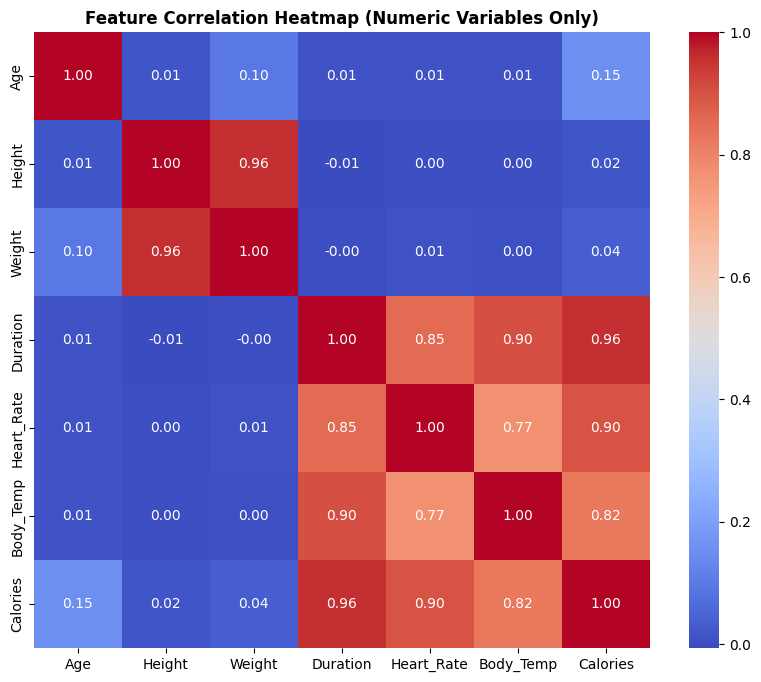

In [31]:
corr = df_train.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True
)
plt.title("Feature Correlation Heatmap (Numeric Variables Only)",fontweight="bold")
plt.show()


### Interpretations:

- Age with every other features (=0.01) → age is effectively independent but with Calories it is 0.15.
- Height with Weight and Duration with Calories are highly positively correlated (0.96).

In [32]:
df_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
9839,male,37,179,77,7,81,39.5,17
9680,male,23,195,87,26,110,40.5,167
7093,male,33,181,77,12,88,40.1,40
11293,female,66,156,54,9,77,39.5,34
820,female,32,144,49,5,90,39.0,23
...,...,...,...,...,...,...,...,...
5191,female,75,148,51,22,104,40.6,151
13418,female,21,172,67,20,104,40.7,114
5390,male,57,189,92,8,90,39.5,41
860,male,35,174,76,12,97,40.2,57


In [33]:
# One Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_gender= encoder.fit_transform(X_train[['Gender']])
X_test_gender= encoder.transform(X_test[['Gender']])


In [34]:
X_train_gender

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], shape=(12000, 1))

In [35]:
X_test_gender

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], shape=(3000, 1))

In [36]:
# Dropping Gender from original features
X_train_num = X_train.drop(columns=['Gender'])
X_test_num  = X_test.drop(columns=['Gender'])


In [37]:
# Scaling numerical features
scaler = StandardScaler()
X_train_num_scaled= scaler.fit_transform(X_train_num)
X_test_num_scaled= scaler.transform(X_test_num)


In [38]:
# Combining scaled numerical + encoded categorical features
X_train_scaled = np.hstack([X_train_num_scaled, X_train_gender])
X_test_scaled  = np.hstack([X_test_num_scaled, X_test_gender])


In [39]:
X_train_scaled

array([[-0.33729461,  0.32323185,  0.1395506 , ..., -1.51737651,
        -0.67103106,  1.        ],
       [-1.16332224,  1.44792406,  0.80595486, ...,  1.52242538,
         0.61448958,  1.        ],
       [-0.57330251,  0.46381838,  0.1395506 , ..., -0.78363123,
         0.10028132,  1.        ],
       ...,
       [ 0.84274485,  1.02616448,  1.13915699, ..., -0.57398972,
        -0.67103106,  1.        ],
       [-0.45529856, -0.02823446,  0.07291018, ...,  0.15975557,
         0.22883339,  1.        ],
       [-0.98631632,  0.53411164,  0.73931444, ..., -0.46916896,
         0.61448958,  1.        ]], shape=(12000, 7))

In [40]:
X_test_scaled

array([[ 0.13472117, -1.43409972, -1.52646004, ...,  1.20796311,
         0.74304164,  0.        ],
       [-1.28132619,  0.88557796,  1.00587614, ...,  1.62724613,
         0.61448958,  1.        ],
       [ 0.90174683,  0.11235207,  0.1395506 , ..., -0.57398972,
        -0.02827074,  1.        ],
       ...,
       [-0.27829264, -0.37970078, -0.59349408, ...,  0.89350085,
         0.22883339,  0.        ],
       [-1.0453183 , -0.80146035, -1.39317918, ..., -0.99327274,
        -1.05668726,  0.        ],
       [-0.98631632,  0.46381838,  0.60603358, ...,  2.15134991,
         1.51435403,  1.        ]], shape=(3000, 7))

In [41]:
print("Dataset splits:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print("=" * 70)

# Defining models and hyperparameter grids
models_params = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha": [0.01, 0.1, 1.0, 10.0, 100.0],
            "solver": ["auto", "svd", "cholesky"]
        }
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            "alpha": [0.001, 0.01, 0.1, 1.0, 10.0],
            "max_iter": [1000, 5000]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [10, 20, None],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [3, 5],
            "learning_rate": [0.01, 0.1],
            "subsample": [0.8, 1.0]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42, verbosity=0),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [3, 5],
            "learning_rate": [0.01, 0.1],
            "subsample": [0.8, 1.0]
        }
    },
    "SVR": {
        "model": SVR(),
        "params": {
            "kernel": ["rbf"],
            "C": [0.1, 1.0, 10.0],
            "gamma": ["scale", "auto"],
            "epsilon": [0.1, 0.2]
        }
    }
}

# Storing results
training_results = []
best_models = {}

print("\nTraining Models with GridSearchCV...")
print("=" * 70)

for name, config in models_params.items():
    print(f"\nTraining {name}...")
    
    if config["params"]:
        # Performing GridSearchCV on training set
        grid_search = GridSearchCV(
            estimator=config["model"],
            param_grid=config["params"],
            cv=5,  # cv=5 uses 5-fold cross-validation, meaning the data is split into five parts and the model is trained and validated five times. This reduces dependence on a single train–test split and provides a more reliable performance estimate. Five folds are commonly chosen because they offer a good bias–variance trade-off while keeping computational cost reasonable, especially for medium to large datasets.
            scoring="r2",
            n_jobs=2,
            verbose=1
        )
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_cv_r2 = grid_search.best_score_
    else:
        # No hyperparameters to tune
        best_model = config["model"]
        best_model.fit(X_train_scaled, y_train)
        best_params = "N/A"
        best_cv_r2 = None
    
    # Computing training R²
    train_pred = best_model.predict(X_train_scaled)
    train_r2 = r2_score(y_train, train_pred)
    
    # Storing results
    training_results.append({
        "Model": name,
        "Training R²": f"{train_r2:.4f}",
        "CV R²": f"{best_cv_r2:.4f}" if best_cv_r2 is not None else "N/A",
        "Best Params": str(best_params)
    })
    
    # Storing best model
    best_models[name] = {
        "model": best_model,
        "params": best_params,
        "train_r2": train_r2,
        "cv_r2": best_cv_r2 if best_cv_r2 is not None else train_r2
    }
    
    print(f"  Best params: {best_params}")
    print(f"  Training R²: {train_r2:.4f}")
    if best_cv_r2 is not None:
        print(f"  CV R²: {best_cv_r2:.4f}")

# Displaying training results
training_results_df = pd.DataFrame(training_results)
print("\n" + "=" * 70)
print("TRAINING RESULTS")
print("=" * 70)
print(training_results_df.to_string(index=False))

# Finding best model based on CV R² score (or training R² if CV not available)
best_model_name = max(best_models.items(), key=lambda x: x[1]["cv_r2"])[0]
best_model_info = best_models[best_model_name]

print("\n" + "=" * 70)
print(f"BEST MODEL SELECTED: {best_model_name}")
print("=" * 70)
print(f"Best parameters: {best_model_info['params']}")
print(f"Training R²: {best_model_info['train_r2']:.4f}")

# Retrain the best model on full training data
print("\n" + "=" * 70)
print(f"RETRAINING BEST MODEL ON FULL TRAINING DATA - {best_model_name}")
print("=" * 70)

# Getting the best model with its optimal hyperparameters
if best_model_info['params'] != "N/A":
    # Recreating model with best parameters
    if best_model_name == "Ridge":
        best_model = Ridge(**best_model_info['params'])
    elif best_model_name == "Lasso":
        best_model = Lasso(**best_model_info['params'])
    elif best_model_name == "Random Forest":
        best_model = RandomForestRegressor(**best_model_info['params'], random_state=42)
    elif best_model_name == "Gradient Boosting":
        best_model = GradientBoostingRegressor(**best_model_info['params'], random_state=42)
    elif best_model_name == "XGBoost":
        best_model = XGBRegressor(**best_model_info['params'], random_state=42, verbosity=0)
    elif best_model_name == "SVR":
        best_model = SVR(**best_model_info['params'])
    
    # Retrain on full training data
    best_model.fit(X_train_scaled, y_train)
    print(f"Model retrained with best parameters: {best_model_info['params']}")
else:
    # Linear Regression - already trained
    best_model = best_model_info["model"]
    print(f"Model: {best_model_name} (no hyperparameters to tune)")

# Evaluate on test set
print("\n" + "=" * 70)
print(f"EVALUATION - {best_model_name}")
print("=" * 70)

# Training set performance
train_pred = best_model.predict(X_train_scaled)
train_r2 = r2_score(y_train, train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
train_mae = mean_absolute_error(y_train, train_pred)

# Test set performance
test_pred = best_model.predict(X_test_scaled)
test_r2 = r2_score(y_test, test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
test_mae = mean_absolute_error(y_test, test_pred)

print(f"\nTraining Set Metrics:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  MAE: {train_mae:.2f}")

print(f"\nTest Set Metrics:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  MAE: {test_mae:.2f}")

# Performance comparison table
print("\n" + "=" * 70)
print("PERFORMANCE COMPARISON")
print("=" * 70)
comparison = pd.DataFrame({
    "Metric": ["R² Score", "RMSE", "MAE"],
    "Training": [f"{train_r2:.4f}", f"{train_rmse:.2f}", f"{train_mae:.2f}"],
    "Test": [f"{test_r2:.4f}", f"{test_rmse:.2f}", f"{test_mae:.2f}"]
})
print(comparison.to_string(index=False))

# Prediction examples
print("\n" + "=" * 70)
print("SAMPLE PREDICTIONS ON TEST SET")
print("=" * 70)
sample_size = min(10, len(y_test))
sample_df = pd.DataFrame({
    "Actual": y_test[:sample_size],
    "Predicted": test_pred[:sample_size],
    "Error": y_test[:sample_size] - test_pred[:sample_size]
})
print(sample_df.to_string(index=False))

print("\n" + "=" * 70)
print("Analysis complete!")
print("=" * 70)

Dataset splits:
Training set: 12000 samples
Test set: 3000 samples

Training Models with GridSearchCV...

Training Linear Regression...
  Best params: N/A
  Training R²: 0.9672

Training Ridge...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
  Best params: {'alpha': 0.01, 'solver': 'auto'}
  Training R²: 0.9672
  CV R²: 0.9670

Training Lasso...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
  Best params: {'alpha': 0.001, 'max_iter': 1000}
  Training R²: 0.9672
  CV R²: 0.9670

Training Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
  Best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
  Training R²: 0.9997
  CV R²: 0.9976

Training Gradient Boosting...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
  Best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
  Training R²: 0.9992
  CV R²: 0.9987

Training XGBoost...
Fitting 5 folds 

The dataset was divided into 12,000 training and 3,000 test observations. Model selection and hyperparameter tuning were performed using 5-fold cross-validation, where the training data is split into five subsets and the model is trained and validated five times. This approach reduces dependence on a single data split and provides a more reliable estimate of generalization performance, while maintaining a good bias–variance trade-off with reasonable computational cost.

Linear models (Linear, Ridge, and Lasso) achieved moderate performance (R² ≈ 0.97), indicating primarily linear relationships. In contrast, nonlinear models—including Random Forest, Gradient Boosting, XGBoost, and SVR—showed substantially higher predictive power, with cross-validated R² values exceeding 0.99.

Support Vector Regression (SVR) emerged as the best-performing model, achieving the highest cross-validated R². After retraining on the full training set, SVR delivered excellent test performance (R² = 0.9996, RMSE = 1.23, MAE = 0.57), with training and test metrics closely aligned, indicating minimal overfitting.

Critical remark:
The consistently near-perfect performance across models suggests a highly structured or synthetic dataset. While the modeling procedure is statistically sound, such results should not be overgeneralized to real-world physiological data.

In [42]:
# Splitting features and target
X = df.drop("Calories", axis=1)
y = df["Calories"]

# One-hot encoding Gender
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_gender = encoder.fit_transform(X[['Gender']])

# Numerical features
num_features = X.drop(columns="Gender").columns.tolist()

# Scaling numerical features
scaler = StandardScaler()
X_scaled_num = scaler.fit_transform(X[num_features])

# Combining numerical + encoded categorical
X_scaled = np.hstack([X_scaled_num, X_gender])

# Constructing FINAL feature names 
final_feature_names = num_features + encoder.get_feature_names_out(['Gender']).tolist()

# Training model on the full dataset
model = SVR(C=10.0, epsilon=0.1, gamma='scale', kernel='rbf')
model.fit(X_scaled, y)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,10.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [43]:
# Saving everything correctly
pickle.dump(model, open("best_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(final_feature_names, open("feature_names.pkl", "wb"))

print("✓ Model saved correctly")
print("✓ Scaler saved correctly")
print("✓ Feature names saved correctly")
print("\nFinal feature order:")
print(final_feature_names)

✓ Model saved correctly
✓ Scaler saved correctly
✓ Feature names saved correctly

Final feature order:
['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Gender_male']


### Model Training and Evaluation Pipeline

| Step | Description |
|------|-------------|
| Full Dataset | Complete dataset available for modeling |
| ↓ |  |
| Training Dataset | Data used for model building and cross-validation |
| Test Dataset | Held-out, unseen data for final evaluation |
| ↓ |  |
| **Model Training** | Multiple models trained in parallel |
| Model 1 (Linear Regression) → GridSearchCV (5-fold CV) → Mean CV R² | Hyperparameter tuning and cross-validation |
| Model 2 (Random Forest) → GridSearchCV (5-fold CV) → Mean CV R² | Hyperparameter tuning and cross-validation |
| Model N (SVR) → GridSearchCV (5-fold CV) → Mean CV R² | Hyperparameter tuning and cross-validation |
| ↓ |  |
| **Best Model Selection** | Model with highest mean CV R² chosen |
| ↓ |  |
| Retraining | Best model retrained on full training dataset |
| ↓ |  |
| **Final Evaluation** | Performance metrics (R², RMSE, MAE) reported on test dataset |
